<a href="https://colab.research.google.com/github/imasy36/Machine-Learning-with-python/blob/master/FMNIST_categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# model to predict the category of cloth 
# dataset used F_MNIST_data
# author @imasy36

In [ ]:
%matplotlib inline
from google.colab import files
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
#getting data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5))])
traindata = datasets.FashionMNIST('FMNIST_data/',train=True, download=True, transform=trans)
testdata = datasets.FashionMNIST('FMNIST_data/', train=False, download=True, transform=trans)
trainloader = torch.utils.data.DataLoader(traindata, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testdata, batch_size=64, shuffle=True)

Extracting FMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to FMNIST_data/FashionMNIST/raw


Extracting FMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FMNIST_data/FashionMNIST/raw


Extracting FMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FMNIST_data/FashionMNIST/raw





Extracting FMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FMNIST_data/FashionMNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


torch.Size([64, 1, 28, 28])


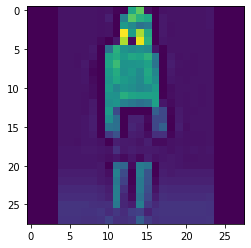

In [ ]:
# verifying data
temp = iter(trainloader)
images, labels = temp.next()
print(images.size())
plt.imshow(images[4].numpy().squeeze())

In [ ]:
# creating Model
from collections import OrderedDict
model = torch.nn.Sequential(OrderedDict([
            ('InputLayer',torch.nn.Linear(784,256)),
            ('ReLU1',torch.nn.ReLU()),
            ('HiddenLayer1',torch.nn.Linear(256,128)),
            ('ReLU2',torch.nn.ReLU()),
            ('HiddenLayer2',torch.nn.Linear(128,64)),
            ('ReLU3',torch.nn.ReLU()),
            ('OutputLayer',torch.nn.Linear(64,10)),
            ('Softmax',torch.nn.Softmax(dim=1)),                                       
]))
print(model)

Sequential(
  (InputLayer): Linear(in_features=784, out_features=256, bias=True)
  (ReLU1): ReLU()
  (HiddenLayer1): Linear(in_features=256, out_features=128, bias=True)
  (ReLU2): ReLU()
  (HiddenLayer2): Linear(in_features=128, out_features=64, bias=True)
  (ReLU3): ReLU()
  (OutputLayer): Linear(in_features=64, out_features=10, bias=True)
  (Softmax): Softmax(dim=1)
)


In [ ]:
loss_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
#training model
epochs = 2
running_loss = 0
steps = 0
print_step = 50
for e in range(epochs):
  for images, labels in trainloader:
    steps+=1
    images = images.resize_(images.size()[0], 784)
    output = model.forward(images)
    optimizer.zero_grad()
    loss = loss_fun(output, labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
    if steps % print_step == 0:
      print("epochs {} of {} | running loss {}".format(e+1,epochs,running_loss/print_step))
      running_loss = 0


epochs 1 of 2 | running loss 1.6646735572814941
epochs 1 of 2 | running loss 1.650445008277893
epochs 1 of 2 | running loss 1.6553907418251037
epochs 1 of 2 | running loss 1.659976499080658
epochs 1 of 2 | running loss 1.6503967690467833
epochs 1 of 2 | running loss 1.6606854319572448
epochs 1 of 2 | running loss 1.6656125831604003
epochs 1 of 2 | running loss 1.6743265247344972
epochs 1 of 2 | running loss 1.653717007637024
epochs 1 of 2 | running loss 1.6511664056777955
epochs 1 of 2 | running loss 1.6545565032958984
epochs 1 of 2 | running loss 1.6525513792037965
epochs 1 of 2 | running loss 1.6642855954170228
epochs 1 of 2 | running loss 1.6471915817260743
epochs 1 of 2 | running loss 1.6475521373748778
epochs 1 of 2 | running loss 1.6528394770622254
epochs 1 of 2 | running loss 1.6520291757583618
epochs 1 of 2 | running loss 1.647634825706482
epochs 2 of 2 | running loss 1.655464768409729
epochs 2 of 2 | running loss 1.6545715069770812
epochs 2 of 2 | running loss 1.65551760196685

In [ ]:
# testing data
steps = 0
acc = 0
print_step = 30
for images, labels in testloader:
  steps += 1
  images = images.resize_(images.size(0),784)
  with torch.no_grad() :
    output = model.forward(images)
  pr = torch.nn.functional.softmax(output, dim =1) 
  equal = (labels.data == pr.max(1)[1])
  acc += equal.type(torch.FloatTensor).mean()
  if steps%print_step == 0 :
    print("Accuracy : {}".format(acc/print_step))
    acc = 0

Accuracy : 0.8010416626930237
Accuracy : 0.8088541626930237
Accuracy : 0.8067708611488342
Accuracy : 0.7906249761581421
Accuracy : 0.8098958134651184


tensor(8)
Prediction : 2


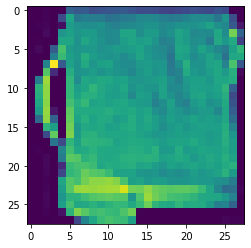

In [ ]:
images, labels = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze())
print(labels[0])
ps = torch.nn.functional.softmax(model.forward(images.resize_(64,784)),dim=1)
print("Prediction : {}".format(ps.max(1)[1][0]))